<a href="https://colab.research.google.com/github/Hanhpt23/DeepLearning_FIT2023/blob/main/1.ImplementGradientDescentForRegression%2BClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Contents:
1. Implement numerical Gradient Descent (GD) from scratch
2. Implement explicit GD from the [Least Squares](https://en.wikipedia.org/wiki/Least_squares) loss function
3. Implement 3 variants of the each GD
4. Building the model using the GD for linear regression following the [Sklearn](https://scikit-learn.org/stable/)'s style
5. Building a model using the GD for binary classification
6. Buidling a model using the GD for mutil-class classification
7. Test the model on the [MNIST](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) dataset

#Import necessary packages and libraries (numpy and sklearn)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd
import time

# increase the width of boxes in the notebook file (this is only cosmetic)
np.set_printoptions(linewidth=180)

# Problem 1 Gradient Descent

## 1. Gradient descent with an option to use the explicit gradient formula of a loss function

Implementing numerical gradient descent and explicit gradient descent

In [ ]:
# estimate the gradient
def computeGradient(f, x, h):
    n = len(x)
    gradient = np.zeros(n)

    for counter in range(n):
        xUp = x.copy()
        xUp[counter] += h
        gradient[counter] = (f(xUp) - f(x))/h

    return gradient

# Explicit gradient
def compute_explicit_gradient(X, y, w):
    # Calculate the gradient of the function with respect to w
    gradient = 2 * np.dot(X.T, (np.dot(X, w) - y))
    theta = np.linalg.inv(X.T@X)@X.T@y
    return gradient

Test output from the two gradient methods

In [ ]:
X = np.array([[6], [7], [8], [9], [7] ])
y = np.array([1, 2, 3, 3, 4])
x0 = [0, 0]
X = np.hstack((np.ones([X.shape[0], 1]), X))
L = lambda w: ((X @ w).T - y.T) @ (X @ w - y)

# test numerical gradient
gradient_num = computeGradient(L, x0, 0.001)

# test explicit gradient
gradient_exp = compute_explicit_gradient(X, y, x0)
print('Numerical gradient: ', gradient_num, '\n',
      'Explicit gradient: ', gradient_exp)



Numerical gradient:  [ -25.995 -197.721] 
 Explicit gradient:  [ -26. -198.]


Optimizing parameters from gradients using two method by declare that

use_explicit_gradient = True or False

In [ ]:
# run gradient descent and output the coordinates of the estimated critical point
def gradientDescent(f, y, x0, alpha, h, tolerance, maxIterations, use_explicit_gradient = False):
    # set x equal to the initial guess
    x = x0

    # take up to maxIterations number of steps
    for counter in range(maxIterations):
        # choosing gradient method
        if use_explicit_gradient:
          gradient = compute_explicit_gradient(X, y, x)
        else:
          gradient = computeGradient(f, x, h)

        # stop if the norm of the gradient is near 0 (success)
        if np.linalg.norm(gradient) < tolerance:
            print('Gradient descent took', counter, 'iterations to converge')
            # print('The norm of the gradient is', np.linalg.norm(gradient))

            # return the approximate critical point x
            return x

        # print a message if we do not converge (failure)
        elif counter == maxIterations-1:
            print("Gradient descent failed")
            # print('The gradient is', gradient)

            # return x, sometimes it is still pretty good
            return x

        # take a step in the opposite direction as the gradient
        x -= alpha*gradient

Test converenge of the model using the numerical gradient


In [ ]:
X = np.array([[6], [7], [8], [9], [7] ])
y = np.array([1, 2, 3, 3, 4])
x0 = [0, 0]
X = np.hstack((np.ones([X.shape[0], 1]), X))
L = lambda w: ((X @ w).T - y.T) @ (X @ w - y)

# numerical gradient
x_params = gradientDescent(L, y, x0, alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 10000000, use_explicit_gradient = False)
print('x_params', x_params)
print('Prediction y_hat using numerical gradient: \n', X@x_params)
print(f'Loss of the prediction value is {((y-X@x_params)**2).sum(axis =0)}')

Gradient descent took 17180 iterations to converge
x_params [-1.15880201  0.5080126 ]
Prediction y_hat using numerical gradient: 
 [1.88927362 2.39728623 2.90529883 3.41331144 2.39728623]
Loss of the prediction value is 3.697130014379029


Test converenge of the model using the explicit gradient

In [ ]:
# explicit gradient
x_params = gradientDescent(L, y, x0, alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 100000, use_explicit_gradient = True)
print('x_params', x_params)
print('Prediction y_hat using explicit gradient: \n', X@x_params)
print(f'Loss of the prediction value is {((y-X@x_params)**2).sum(axis =0)}')

Gradient descent took 17878 iterations to converge
x_params [-1.33049327  0.5312817 ]
Prediction y_hat using explicit gradient: 
 [1.85719691 2.38847861 2.91976031 3.451042   2.38847861]
Loss of the prediction value is 3.6925806662475953


## 2. Choosing n random starting points and output the parameters resulting in minimum training loss across all the runs.

In [ ]:
def run_optimization(num_points, f, y, alpha, h, tolerance, maxIterations, explicit = True):
    best_params = None
    best_loss = float('inf')

    for _ in range(num_points):
        # Generate a random starting point
        initial_theta = np.random.rand(2)  # Assuming 2 parameters (x and y)
        print('Initial starting points: ', initial_theta )

        # Perform gradient descent
        optimized_theta = gradientDescent(f, y, initial_theta, alpha, h, tolerance, maxIterations,  use_explicit_gradient = explicit)

        # Calculate the loss for the optimized parameters
        current_loss = f(optimized_theta)

        # Check if this run has the lowest loss so far
        if current_loss < best_loss:
            best_loss = current_loss
            best_params = optimized_theta

    return best_params, best_loss

Test model

In [ ]:
best_params, best_loss = run_optimization(num_points = 2, f = L, y = y, alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 10000000)
print(f'best_params {best_params} with the loss of {best_loss}')

Initial starting points:  [0.00691004 0.74718517]
Gradient descent took 17521 iterations to converge
Initial starting points:  [0.45673406 0.17185419]
Gradient descent took 19302 iterations to converge
best_params [-1.33049495  0.53128192] with the loss of 3.6925806493106315


## 3. Write a version with a cyclic learning rate that changes in each training epoch and saves the model parameters every time the learning rate vanishes. Then, select the best parameters observed.

In [ ]:
def gradient_descent_lrSchedual(num_epochs, num_points, f, y, x0, alpha, h, tolerance, maxIterations):
    # Gradient Descent optimization algorithm with cyclic learning rate.
    x = x0
    best_params = None
    best_loss = float('inf')

    for epoch in range(num_epochs):
        learning_rate = alpha / (epoch + 1) # reduce learning rate for every epoch
        print('Epoch ', epoch)

        # x = gradientDescent(f, y, x0, learning_rate, h, tolerance, maxIterations,  use_explicit_gradient = True)
        x, loss = run_optimization(num_points, f, y, alpha, h, tolerance, maxIterations, explicit = True)

        # Save parameters every time the learning rate vanishes
        np.savetxt(f"model_parameters_epoch_{epoch}.txt", x)

        # Calculate the loss for the optimized parameters
        current_loss = loss

        # Check if this run has the lowest loss so far
        if current_loss < best_loss:
            best_loss = current_loss
            best_params = x
            best_epoch = epoch

    print('Finding the best parameters at the epoch of ', best_epoch)

    return best_params, best_loss


Test model

In [ ]:
num_epochs = 3
num_points = 2 # sets initial values
best_params, best_loss = gradient_descent_lrSchedual(num_epochs, num_points, f = L, y= y, x0 = x0, alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 10000000)

print("Best Parameters:", best_params)
print("Best Loss:", best_loss)

Epoch  0
Initial starting points:  [0.1962297  0.19137485]
Gradient descent took 18484 iterations to converge
Initial starting points:  [0.90674916 0.62421733]
Gradient descent took 20327 iterations to converge
Epoch  1
Initial starting points:  [0.73180306 0.38438901]
Gradient descent took 19973 iterations to converge
Initial starting points:  [0.15861568 0.70958004]
Gradient descent took 18115 iterations to converge
Epoch  2
Initial starting points:  [0.90060792 0.00588006]
Gradient descent took 20505 iterations to converge
Initial starting points:  [0.87622799 0.391725  ]
Gradient descent took 20327 iterations to converge
Finding the best parameters at the epoch of  0
Best Parameters: [-1.33050136  0.53128277]
Best Loss: 3.6925805845682995


## 4. Write function for prediction for all models and averages the output predictions

###Combining all functions into a class (Model)


In [ ]:
class Model():
    # fit the model to the data
    def fit(self, num_epochs, num_points, X, y, w0, alpha, h, tolerance, max_iterations, gradient_type: str, explicit = False):

        X = np.hstack((np.ones([X.shape[0], 1]), X))

        # find the w values that minimize the sum of squared errors via gradient descent
        L = lambda w: ((X @ w).T - y.T) @ (X @ w - y)

        if gradient_type == 'simple':
          print(f'------------\nUsing the {gradient_type} gradient variant\n-------------')
          self.w = self.gradientDescent( X, L, y, w0, alpha, h, tolerance, max_iterations, explicit)
          self.all = None
        elif gradient_type == 'multipoint':
          print(f'------------\nUsing the {gradient_type} gradient variant\n-------------')
          self.w, _ , self.all = self.run_optimization(num_points, X, L, y, alpha, h, tolerance, max_iterations, explicit = explicit)
        elif gradient_type == 'lrSchedual':
          print(f'------------\nUsing the {gradient_type} gradient variant\n-------------')
          self.w, _, self.all = self.gradient_descent_lrSchedual(num_epochs, num_points, X, L, y, alpha, h, tolerance, max_iterations, explicit)

        return self.all

    # predict the output from testing data
    def predict(self, X):
        # adding a column in to X matrix as intercept
        preds = []
        X = np.hstack((np.ones([X.shape[0],1]), X))
        if self.all is None:
            type(self.all)
            preds = X@self.w
        else:
            for i in self.all:
                pred = X@i
                preds.append(pred)
            preds = np.mean(preds, 0)

        return preds

    # 2. Gradient Descent with n random points
    def run_optimization(self, num_points, X, f, y, alpha, h, tolerance, maxIterations, explicit = True):
        best_params = None
        best_loss = float('inf')
        all_weight = []

        for _ in range(num_points):
            # Generate a random starting point
            initial_theta = np.random.rand(X.shape[1])  # Assuming 2 parameters (x and y)
            print('Initial starting points: ', initial_theta )

            # Perform gradient descent
            optimized_theta = self.gradientDescent(X, f, y, initial_theta, alpha, h, tolerance, maxIterations,  use_explicit_gradient = explicit)

            # Calculate the loss for the optimized parameters
            current_loss = f(optimized_theta)

            # Check if this run has the lowest loss so far
            if current_loss < best_loss:
                best_loss = current_loss
                best_params = optimized_theta

            all_weight.append(optimized_theta)

        return best_params, best_loss, all_weight

    # gradient with epoch
    def gradient_descent_lrSchedual(self, num_epochs, num_points, X, f, y, alpha, h, tolerance, maxIterations, explicit):
        # Gradient Descent optimization algorithm with cyclic learning rate.
        # x = x0
        best_params = None
        best_loss = float('inf')
        all_best_w = []
        all_best_loss = []

        for epoch in range(num_epochs):
            learning_rate = alpha / (epoch + 1) # reduce learning rate for every epoch
            print('Epoch ', epoch)

            # x, loss = run_optimization(num_points, f, y, alpha, h, tolerance, maxIterations, explicit = True)

            x, loss , all_weights = self.run_optimization(num_points, X, f, y, alpha, h, tolerance, maxIterations, explicit = explicit)


            # Save parameters every time the learning rate vanishes
            np.savetxt(f"model_parameters_epoch_{epoch}.txt", x)

            # Calculate the loss for the optimized parameters
            current_loss = loss

            # Check if this run has the lowest loss so far
            if current_loss < best_loss:
                best_loss = current_loss
                best_params = x
                best_epoch = epoch
        all_best_w.append(best_params)
        all_best_loss.append(best_loss)
        print('Finding the best parameters at the epoch of ', best_epoch)

        return best_params, all_best_loss, all_best_w


    # run gradient descent and output the coordinates of the estimated critical point
    def gradientDescent(self, X, f, y, x0, alpha, h, tolerance, maxIterations, use_explicit_gradient = False):
        # set x equal to the initial guess
        x = x0

        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            if use_explicit_gradient:
              gradient = self.compute_explicit_gradient(X, y, x)
            else:
              gradient = self.computeGradient(f, x, h)


            # stop if the norm of the gradient is near 0 (success)
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')

                # print('The norm of the gradient is', np.linalg.norm(gradient))

                # return the approximate critical point x
                return x

            # print a message if we do not converge (failure)
            elif counter == maxIterations-1:
                print("Gradient descent failed")

                # return x, sometimes it is still pretty good
                return x

            # take a step in the opposite direction as the gradient
            x -= alpha*gradient

    # estimate the gradient
    def computeGradient(self, f, x, h):
        n = len(x)
        gradient = np.zeros(n)

        for counter in range(n):
            xUp = x.copy()
            xUp[counter] += h
            gradient[counter] = (f(xUp) - f(x))/h

        return gradient

    # Explicit gradient
    def compute_explicit_gradient(self, X, y, w):
        # Calculate the gradient of the function with respect to w
        gradient = 2 * np.dot(X.T, (np.dot(X, w) - y))

        return gradient


###Test model =====> Save all sets of parameters

In [ ]:
X = np.array([[6], [7], [8], [9], [7] ])
y = np.array([1, 2, 3, 3, 4])
num_epochs = 3
num_points = 2 # sets initial values

explicits = [True, False]
gradient_type = ['multipoint']

x0 = np.random.rand(X.shape[1] +1)*0.001
for explicit in explicits:
  if explicit: print('\nUsing explicit gradient\n-------------------------------------------------------------')
  else: print('\nUsing numerical gradient method\n-------------------------------------------------------------')

  for g_type in gradient_type:
    model = Model()
    model.fit(num_epochs, num_points, X, y, x0, alpha = 0.001, h = 0.001, tolerance = 0.01, max_iterations = 10000000, gradient_type = g_type, explicit = False)
    prediction = model.predict(X)

    # print('Prediction from exact solution: \n', prediction)
    print('Mean of predictions: ', prediction)


Using explicit gradient
-------------------------------------------------------------
------------
Using the multipoint gradient variant
-------------
Initial starting points:  [0.21266287 0.19583833]
Gradient descent took 17923 iterations to converge
Initial starting points:  [0.98371829 0.14897675]
Gradient descent took 20243 iterations to converge
Mean of predictions:  [1.88927257 2.39728586 2.90529915 3.41331243 2.39728586]

Using numerical gradient method
-------------------------------------------------------------
------------
Using the multipoint gradient variant
-------------
Initial starting points:  [0.14544756 0.6303754 ]
Gradient descent took 17438 iterations to converge
Initial starting points:  [0.57384009 0.82776784]
Gradient descent took 18868 iterations to converge
Mean of predictions:  [1.88927218 2.39728572 2.90529926 3.4133128  2.39728572]


##5. Test model on [Mount Pleasant Real Estate Dataset](https://www.hawkeslearning.com/Statistics/dis/datasets.html)


###Testing six variants of the gradient

Before jumping on the Mount pleasant Real Estate dataset, it should be better to test it on a samll dataset.



In [ ]:
X = np.array([[6], [7], [8], [9], [7] ])
y = np.array([1, 2, 3, 3, 4])
num_epochs = 2
num_points = 2 # sets initial values

explicits = [True, False]
gradient_type = ['simple', 'multipoint', 'lrSchedual']

x0 = np.random.rand(X.shape[1] +1)*0.001
for explicit in explicits:
  for g_type in gradient_type:
    model = Model()
    model.fit(num_epochs, num_points, X, y, x0, alpha = 0.001, h = 0.001, tolerance = 0.01, max_iterations = 10000000, gradient_type = g_type, explicit = False)
    prediction = model.predict(X)

    # print('Prediction from exact solution: \n', prediction)
    print('Mean of predictions: ', prediction)


------------
Using the simple gradient variant
-------------
Gradient descent took 17182 iterations to converge
Mean of predictions:  [1.88927226 2.39728575 2.90529924 3.41331273 2.39728575]
------------
Using the multipoint gradient variant
-------------
Initial starting points:  [0.07109899 0.3307451 ]
Gradient descent took 17295 iterations to converge
Initial starting points:  [0.87212846 0.493542  ]
Gradient descent took 19846 iterations to converge
Mean of predictions:  [1.88927326 2.3972861  2.90529894 3.41331178 2.3972861 ]
------------
Using the lrSchedual gradient variant
-------------
Epoch  0
Initial starting points:  [0.12730143 0.19863234]
Gradient descent took 17594 iterations to converge
Initial starting points:  [0.52929182 0.21407131]
Gradient descent took 18982 iterations to converge
Epoch  1
Initial starting points:  [0.92998809 0.3062563 ]
Gradient descent took 20058 iterations to converge
Initial starting points:  [0.39005756 0.34445057]
Gradient descent took 18480

###Prediction the Mount_Pleasant_Real_Estate_Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/Mount_Pleasant_Real_Estate_Data.csv')

# Define a mapping from 'yes' to 1 and 'no' to 0
binary_mapping = {'Yes': 1, 'No': 0}

# Convert the 'yes/no' column to binary
df['Duplex?'] = df['Duplex?'].map(binary_mapping) # C
df['New Owned?'] = df['New Owned?'].map(binary_mapping) # M

df['Has Pool?'] = df['Has Pool?'].map(binary_mapping) # Q
df['Has Dock?'] = df['Has Dock?'].map(binary_mapping) # R
df['Fenced Yard'] = df['Fenced Yard'].map(binary_mapping) # S
df['Screened Porch?'] = df['Screened Porch?'].map(binary_mapping) # T

df['Golf Course?'] = df['Golf Course?'].map(binary_mapping) # V
df['Fireplace?'] = df['Fireplace?'].map(binary_mapping) # W

categorical_columns = ['Subdivision', 'House Style', ]
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Extracting input and ground truth from the data
input_columns = df.columns[list(range(2, 14)) + list(range(16, 19)) + list(range(21, 22))]

# Create a new DataFrame containing only the selected input columns
X = np.array(df[input_columns], dtype=float)
y = np.array(df[df.columns[1]], dtype=float)

# Using data from the defined columns (C-O, Q-T, and V-W)
print(X.shape, np.mean(X, axis = 0).shape, np.mean(X, axis = 1).shape)

#Normalize data with some columns
X[:, [1, 2, 3, 5, 7, 8, 9]] = (X[:, [1, 2, 3, 5, 7, 8, 9]] - np.mean(X[:, [1, 2, 3, 5, 7, 8, 9]], axis = 0))/np.std(X[:, [1, 2, 3, 5, 7, 8, 9]], axis = 0)

# split the data into training and test sets
trainX, testX, trainY, testY = train_test_split(X, y, train_size = 0.24, random_state =42)

trainX = scale(trainX)
testX = scale(testX)


(245, 16) (16,) (245,)


Training model and and using saved weights for prediction

In [ ]:
explicits = [True, False]
gradient_type = ['simple', 'multipoint', 'lrSchedual']
num_epochs = 2
num_points = 2 # sets initial values
x0 = np.random.rand(trainX.shape[1] +1)*0.001
for explicit in explicits:
  if explicit: print('\nUsing explicit gradient\n-------------------------------------------------------------')
  else: print('\nUsing numerical gradient method\n-------------------------------------------------------------')

  for g_type in gradient_type:
    model = Model()

    # Fitting model
    fstart = time.time()
    model.fit(num_epochs, num_points,  trainX, trainY, x0, alpha = 0.001, h = 0.001, tolerance = 0.01, max_iterations = 10000, gradient_type = g_type, explicit = False)
    fend = time.time()
    print(f"\nFitting time is {fend - fstart}")

    print('\nPredicting the model...\n')

    trainPredictions_num_all = model.predict(X)

    # Prediction
    pstart = time.time()
    trainPredictions_num = model.predict(trainX)
    pend = time.time()
    print(f"Prediction time is {pend - pstart}")

    print('\nThe r^2 score is\t', r2_score(trainY, trainPredictions_num))


    # print quality metrics
    print('\nThe mean absolute error on the training set is\t', mean_absolute_error(trainY, trainPredictions_num))

    # return the predicted outputs for the datapoints in the test set
    predictions_num = model.predict(testX)

    # print the predictions
    print('\nThe predicted y values for the test set are\t', np.round(predictions_num,0))

    # print the real y values
    print('The real y values for the test set are\t', testY)

    # print the weights
    print('\nThe weights are\t', model.w)

    # print quality metrics
    print('\nThe mean absolute error on the test set is\t', mean_absolute_error(testY, predictions_num), '\n')




Using explicit gradient
-------------------------------------------------------------
------------
Using the simple gradient variant
-------------
Gradient descent failed

Fitting time is 4.387463569641113

Predicting the model...

Prediction time is 5.507469177246094e-05

The r^2 score is	 0.9382950520219118

The mean absolute error on the training set is	 56305.72730190991

The predicted y values for the test set are	 [ 494426.  726599.  194054.  660816.  614813.  502575. 1008868.  226799.  586574.  323530.  729905.  503266.  350834.  112098.  677598. 1381571. 1049112.  549131.  604425.
  675969.  670583.  697544. 2013777.  566526.  773956. 1131719.  637799.  795734.  504825.  487537. 1247219.  436431.  550857.  773943.  524459.  271180.  442128.  706538.
 1332974. 1012579.  649839.  278532. 1285201.  514297.  953049.  709082.  597628.  684080.  530024.  509711.  659097.  455158.  557709.  566622.  915671.  595047.  224909.
  529318.  452727.  307972.  293040.  367541.  473323.  333

# Problem 2 Logistic Classification

##Pre_6. Re-Buiding BinaryLogisticClassifier() model for breast_cancer dataset combination with explicit gradient method

In [ ]:
class BinaryLogisticClassifier():
    # fit the model to the data
    def fit(self,  X, y, w0, alpha, h, tolerance, max_iterations, explicit = False ):

        X = np.hstack((np.ones([X.shape[0], 1]), X))

        # find the w values that minimize the sum of squared errors via gradient descent
        L = lambda w: ((self.sigmoid(X @ w)).T - y.T) @ (self.sigmoid(X @ w) - y)

        self.w = self.gradientDescent(X, L, y, w0, alpha, h, tolerance, max_iterations, use_explicit_gradient = explicit)

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    # predict the output from testing data
    def predict(self, X):
        # adding a column in to X matrix as intercept
        X = np.hstack((np.ones([X.shape[0],1]), X))
        return self.sigmoid(X @ self.w)

    # run gradient descent and output the coordinates of the estimated critical point
    def gradientDescent(self, X, f, y, x0, alpha, h, tolerance, maxIterations, use_explicit_gradient = False):
        # set x equal to the initial guess
        x = x0

        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            if use_explicit_gradient:
              gradient = self.compute_explicit_gradient(X, y, x0)
            else:
              gradient = self.computeGradient(f, x, h)

            # stop if the norm of the gradient is near 0 (success)
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')
                # print('The norm of the gradient is', np.linalg.norm(gradient))

                # return the approximate critical point x
                return x

            # print a message if we do not converge (failure)
            elif counter == maxIterations-1:
                print("Gradient descent failed")
                # print('The gradient is', gradient)

                # return x, sometimes it is still pretty good
                return x

            # take a step in the opposite direction as the gradient
            x -= alpha*gradient

    # estimate the gradient
    def computeGradient(self, f, x, h):
        n = len(x)
        gradient = np.zeros(n)

        for counter in range(n):
            xUp = x.copy()
            xUp[counter] += h
            gradient[counter] = (f(xUp) - f(x))/h

        return gradient

    # Explicit gradient
    def compute_explicit_gradient(self, X, y, w):

        gradient = 2 *np.dot(X.T, (self.sigmoid(np.dot(X, w)) - y))

        return gradient


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# read the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# find the data and labels
X = breast_cancer_data.data
Y = np.array(breast_cancer_data.target, dtype= float)


# split the data into training and test sets
trainX, testX, trainY, testY = train_test_split(X, Y, train_size = 0.75, random_state =42)

trainX = (trainX - np.mean(trainX, axis=0))/np.std(trainX, axis = 0)
testX = (testX - np.mean(testX, axis=0))/np.std(testX, axis = 0)


Test model using numerical gradient

Gradient descent failed


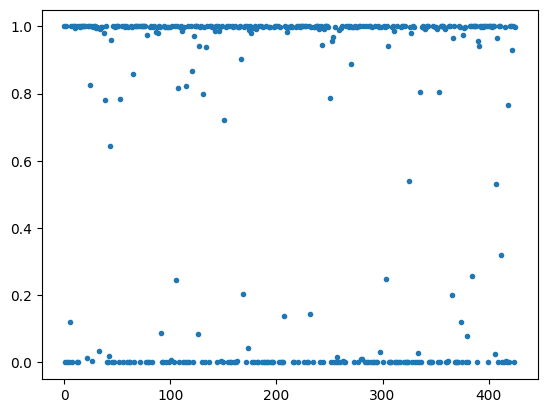

In [ ]:
model = BinaryLogisticClassifier()

model.fit(trainX, trainY, (trainX.shape[1] +1)*[0], 0.001, 0.001, 0.001, 10000, explicit = False)
predictedY = model.predict(trainX)

plt.plot(predictedY, '.')

Test model using explicit gradient

Gradient descent failed


<ipython-input-237-5ff6ba6d33c5>:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


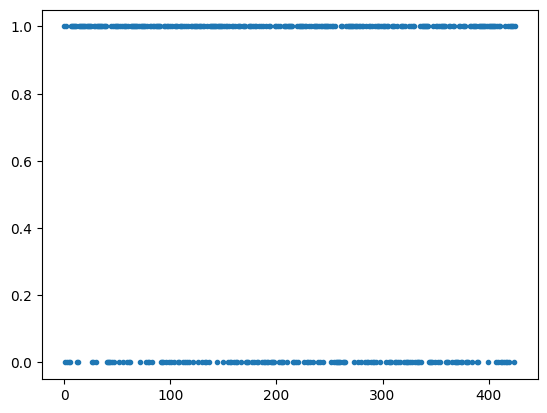

In [ ]:
model = BinaryLogisticClassifier()

model.fit(trainX, trainY, (trainX.shape[1] +1)*[0], 0.001, 0.001, 0.001, 10000, explicit = True)
predictedY = model.predict(trainX)

plt.plot(predictedY, '.')

##6 & 7. Mutil classes classifier Using "Cross-entropy loss" with two options
(1) numerical gradient

(2) explicit gradient (exact gradient from the loss function)

###Notes: In this problem, I use Cross-entropy loss istead of MSE loss


In [ ]:
class v3MultiLogisticClassifier():
    def fit(self, X, y, w0, alpha, h, tolerance, max_iterations, explicit=False):
        X = np.hstack((np.ones([X.shape[0], 1]), X))
        num_samples = len(y)

        epsilon = 1e-15  # Small constant to avoid division by zero or taking log of zero

        # cross-entropy loss
        L = lambda w: -np.sum(np.multiply(y, np.log(np.clip(self.softmax(X @ w), epsilon, 1 - epsilon)))) / num_samples

        self.w = self.gradientDescent(X, L, y, w0, alpha, h, tolerance, max_iterations, use_explicit_gradient=explicit)

        return self.w

    def softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return e_z / e_z.sum(axis=1, keepdims=True)

    def predict(self, X):
        X = np.hstack((np.ones([X.shape[0], 1]), X))
        scores = X @ self.w
        probabilities = self.softmax(scores)
        return  np.argmax(probabilities, axis=1)

    def gradientDescent(self, X, f, y, w0, alpha, h, tolerance, maxIterations, use_explicit_gradient=False):
        # Initialize x (weights) with the same shape as w0
        x = w0.copy()

        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            if use_explicit_gradient:
              gradient = self.compute_explicit_gradient(X, y, x)
            else:
              gradient = self.computeGradient(f, x, h)

            # stop if the norm of the gradient is near 0 (success)
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')

                # return the approximate critical point x
                return x

            # print a message if we do not converge (failure)
            elif counter == maxIterations-1:
                print("Gradient descent failed")
                # print('The gradient is', gradient)

                return x
            # print(X.shape, x.shape, gradient.shape)
            # take a step in the opposite direction as the gradient
            x -= alpha*gradient

    # estimate the gradient
    def computeGradient(self, f, x, h):
        n =  x.shape[0]
        gradient = np.zeros((x.shape[0], x.shape[1]))
        fx = f(x)

        for count in range(n):
            xUp = x.copy()
            xUp[count] += h
            gradient[count] = (f(xUp) - fx)/h
        return gradient

    # Explicit gradient
    def compute_explicit_gradient(self, X, y, w):
        N = len(y)
        gradient = (1/N) *np.dot(X.T, (self.softmax(X@ w) - y))
        # print(gradient.shape)
        return gradient



### Test on MNIST dataset

In [ ]:
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load the MNIST dataset from scikit-learn
# mnist = fetch_openml("mnist_784")
mnist = datasets.load_digits()
X = mnist.data.astype(float)
y = mnist.target.astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize your MultiLogisticClassifier
clf = v3MultiLogisticClassifier()

# Set hyperparameters
alpha = 0.001
h = 0.01
tolerance = 1e-4
max_iterations = 10000
explicit = True

num_features = X_train.shape[1] + 1  # Plus one for the bias term
num_classes = len(np.unique(y_train))

w0 = np.random.rand(num_features, num_classes)*0.001

# Convert class labels to one-hot encoded labels
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


# Fit the model on the training data
clf.fit(X_train, y_train_encoded, w0, alpha, h, tolerance, max_iterations, explicit)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Gradient descent failed
Accuracy: 0.975


###Plot the result

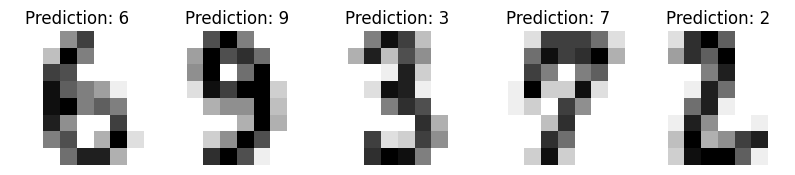

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

##8.  Add functionality to optimize models using the three variants of gradient descent from Problems 2-4.

### Adding functionalities

(1) Single gradient

(2) Using mutil-initial points gradient

(3) Using cyclic learning rate gradient

In [ ]:
class Classifier():

    def fit(self, num_epochs, num_points, X, y, w0, alpha, h, tolerance, max_iterations, gradient_type: str, explicit = False):

        X = np.hstack((np.ones([X.shape[0], 1]), X))

        num_samples = len(y)
        epsilon = 1e-15  # Small constant to avoid division by zero or taking log of zero

        L = lambda w: -np.sum(np.multiply(y, np.log(np.clip(self.softmax(X @ w), epsilon, 1 - epsilon)))) / num_samples

        # 8. Add functionality to optimize models ['simple' 'multipoint' 'lrSchedual']
        if gradient_type == 'simple':
          print(f'------------\nUsing the {gradient_type} gradient variant\n-------------')
          self.w = self.gradientDescent( X, L, y, w0, alpha, h, tolerance, max_iterations, explicit)
          self.all = None

        elif gradient_type == 'multipoint':
          print(f'------------\nUsing the {gradient_type} gradient variant\n-------------')
          self.w, _ , _ = self.run_optimization(num_points, X, L, y, alpha, h, tolerance, max_iterations, explicit = explicit)

        elif gradient_type == 'lrSchedual':
          print(f'------------\nUsing the {gradient_type} gradient variant\n-------------')
          self.w, _, self.all = self.gradient_descent_lrSchedual(num_epochs, num_points, X, L, y, alpha, h, tolerance, max_iterations, explicit)

        return self.w

    def softmax(self, z):
        e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return e_z / e_z.sum(axis=1, keepdims=True)

    # predict the output from testing data
    def predict(self, X):
        # adding a column in to X matrix as intercept
        X = np.hstack((np.ones([X.shape[0],1]), X))
        # if self.all is None:
        scores = X @ self.w
        probabilities = self.softmax(scores)

        return np.argmax(probabilities, axis=1)

    # 2. Gradient Descent with n random points
    def run_optimization(self, num_points, X, f, y, alpha, h, tolerance, maxIterations, explicit = True):
        best_params = None
        best_loss = float('inf')
        all_weight = []

        for _ in range(num_points):
            # Generate a random starting point
            initial_theta = np.random.rand(X.shape[1], y.shape[1])
            print('Initial starting points: ', initial_theta.shape )

            optimized_theta = self.gradientDescent( X, f, y, initial_theta, alpha, h, tolerance, max_iterations, explicit)

            # Calculate the loss for the optimized parameters
            current_loss = f(optimized_theta)

            # Check if this run has the lowest loss so far
            if current_loss < best_loss:
                best_loss = current_loss
                best_params = optimized_theta

            all_weight.append(optimized_theta)

        return best_params, best_loss, all_weight

    # gradient with epoch
    def gradient_descent_lrSchedual(self, num_epochs, num_points, X, f, y, alpha, h, tolerance, maxIterations, explicit):
        # Gradient Descent optimization algorithm with cyclic learning rate.
        best_params = None
        best_loss = float('inf')
        all_best_w = []
        all_best_loss = []

        for epoch in range(num_epochs):
            learning_rate = alpha / (epoch + 1) # reduce learning rate for every epoch
            print('Epoch ', epoch)
            x, loss , all_weights = self.run_optimization(num_points, X, f, y, alpha, h, tolerance, maxIterations, explicit = explicit)

            # Save parameters every time the learning rate vanishes
            np.savetxt(f"model_parameters_epoch_{epoch}.txt", x)

            # Calculate the loss for the optimized parameters
            current_loss = loss

            # Check if this run has the lowest loss so far
            if current_loss < best_loss:
                best_loss = current_loss
                best_params = x
                best_epoch = epoch
        all_best_w.append(best_params)
        all_best_loss.append(best_loss)
        print('Finding the best parameters at the epoch of ', best_epoch)

        return best_params, all_best_loss, all_best_w

    def gradientDescent(self, X, f, y, w0, alpha, h, tolerance, maxIterations, use_explicit_gradient= True):
        # Initialize x (weights) with the same shape as w0
        x = w0.copy()

        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            if use_explicit_gradient:
              gradient = self.compute_explicit_gradient(X, y, x)
            else:
              gradient = self.computeGradient(f, x, h)

            # stop if the norm of the gradient is near 0 (success)
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')

                return x

            # print a message if we do not converge (failure)
            elif counter == maxIterations-1:
                print("Gradient descent failed")

                return x
            # take a step in the opposite direction as the gradient
            x -= alpha*gradient

    # estimate the gradient
    def computeGradient(self, f, x, h):
        n =  x.shape[0]
        gradient = np.zeros((x.shape[0], x.shape[1]))
        fx = f(x)

        for count in range(n):
            xUp = x.copy()
            xUp[count] += h
            gradient[count] = (f(xUp) - fx)/h
        return gradient

    # Explicit gradient
    def compute_explicit_gradient(self, X, y, w):
        N = len(y)
        # print(self.softmax(X@ w).shape, len(y))

        gradient = (1/N) *np.dot(X.T, (self.softmax(np.dot(X, w)) - y))

        return gradient


###Test the added functions on the MNIST dataset

In [ ]:
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load the MNIST dataset from scikit-learn
mnist = datasets.load_digits()
X = mnist.data.astype(float)
y = mnist.target.astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Set hyperparameters
alpha = 0.001
h = 0.01
tolerance = 1e-4
max_iterations = 10000
explicits = [True]

num_features = X_train.shape[1] + 1  # Plus one for the bias term
num_classes = len(np.unique(y_train))

w0 = np.random.rand(num_features, num_classes)*0.001

# Convert class labels to one-hot encoded labels
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

num_epochs, num_points = 2, 1

gradient_type = ['lrSchedual'] #  'simple' 'multipoint' 'lrSchedual'


for explicit in explicits:
  if explicit: print('\nUsing explicit gradient')
  else: print('\nUsing numerical gradient method')
  for g_type in gradient_type:
    model = Classifier()
    model.fit(num_epochs, num_points,X_train, y_train_encoded, w0, alpha, h, tolerance, max_iterations, gradient_type = g_type, explicit = explicit)

    prediction = model.predict(X_test)
    accuracy = np.mean(prediction == y_test)
    print("Accuracy:", accuracy)

    print('Mean of predictions: ', prediction)
    print('\nReal values: ', y_test)


Using explicit gradient
------------
Using the lrSchedual gradient variant
-------------
Epoch  0
Initial starting points:  (65, 10)
Gradient descent failed
Epoch  1
Initial starting points:  (65, 10)
Gradient descent failed
Finding the best parameters at the epoch of  0
Accuracy: 0.9444444444444444
Mean of predictions:  [6 9 3 7 2 1 5 2 5 2 3 4 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 5 4 5 2 4 5 7 0 7 5 9 5 5 4 7 0 1 5 5 9 9 0 2 3 8 0 6 4 4
 9 1 2 8 3 5 2 8 0 4 4 1 3 5 3 1 3 5 9 4 2 7 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 6 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7
 2 2 3 9 8 0 3 2 3 5 6 9 9 4 1 0 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7 1 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 8 5 4 1 5 2 8 8 4 5 7 6 2 2 2 3 4 8 9 3 6 0 9 7 7 0 1
 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 1 5 1 8 4 5 8 

##9. Apply your classifier and all six variants of gradient descent on the MNIST dataset from sklearn

In [ ]:
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load the MNIST dataset from scikit-learn
mnist = datasets.load_digits()
X = mnist.data.astype(float)
y = mnist.target.astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert class labels to one-hot encoded labels
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Set hyperparameters
alpha = 0.001
h = 0.01
tolerance = 1e-4
max_iterations = 10000

num_features = X_train.shape[1] + 1  # Plus one for the bias term
num_classes = len(np.unique(y_train))

w0 = np.random.rand(num_features, num_classes)*0.001

explicits = [True, False]
gradient_type = ['simple', 'multipoint', 'lrSchedual']
num_epochs = 2
num_points = 2 # sets initial values

for explicit in explicits:
  if explicit: print('\nUsing explicit gradient\n-------------------------------------------------------------')
  else: print('\nUsing numerical gradient method\n-------------------------------------------------------------')

  for g_type in gradient_type:
    model = Classifier()
    # fitting model
    fstart = time.time()
    model.fit(num_epochs, num_points,X_train, y_train_encoded, w0, alpha, h, tolerance, max_iterations, gradient_type = g_type, explicit = explicit)
    fend = time.time()
    print(f"\nFitting time is {fend - fstart}")
    print('\nPredicting the model...\n')

    trainPredictions_num_all = model.predict(X)

    pstart = time.time()
    trainPredictions_num = model.predict(X_train)
    pend = time.time()
    print(f"Prediction time is {pend - pstart}")

    prediction = model.predict(X_test)
    accuracy = np.mean(prediction == y_test)
    print("Accuracy:", accuracy)

    print('Mean of predictions: ', prediction)
    print('\nReal values: ', y_test)

    print('\nThe r^2 score is\t', r2_score(y_train, trainPredictions_num))


    # print quality metrics
    print('\nThe mean absolute error on the training set is\t', mean_absolute_error(y_train, trainPredictions_num))

    # return the predicted outputs for the datapoints in the test set
    predictions_num = model.predict(X_test)

    # print the predictions
    print('\nThe predicted y values for the test set are\t', np.round(predictions_num,0))

    # print the real y values
    print('The real y values for the test set are\t', y_test)

    # print the weights
    # print('\nThe weights are\t', model.w)

    # print quality metrics
    print('\nThe mean absolute error on the test set is\t', mean_absolute_error(y_test, predictions_num), '\n')




Using explicit gradient
-------------------------------------------------------------
------------
Using the simple gradient variant
-------------
Gradient descent failed

Fitting time is 5.3680994510650635

Predicting the model...

Prediction time is 0.0007991790771484375
Accuracy: 0.9733333333333334
Mean of predictions:  [6 9 3 7 2 2 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4
 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9 0 5 5 6 6 0 6 4 3 9 3 8 7 2 9 0 4 5 8 6 5 9 9 8 4 2 1 3 7 7
 2 2 3 9 8 0 3 2 2 5 6 9 9 4 1 2 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7 1 6 4 5 6 0 3 2 3 6 7 1 9 1 4 7 6 5 8 5 5 1 5 2 8 8 9 9 7 6 2 2 2 3 4 8 8 3 6 0 9 7 7 0 1
 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8 4 5 